In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# read train files
with open("./new_train3.txt") as f:
    train3data = f.readlines()
size_train3 = len(train3data)
train3 = np.zeros((size_train3,64))
for index,image in enumerate(train3data):
    seperate = image.strip("\n").split(" ")[:-1]
    image_list = np.array(list(map(int,seperate)))
    train3[index,:] = image_list
with open("./new_train5.txt") as f:
    train5data = f.readlines()
size_train5 = len(train5data)
train_y = np.zeros((size_train3,1))      #label 3 is zero
train5 = np.zeros((size_train5,64))
for index,image in enumerate(train5data):
    seperate = image.strip("\n").split(" ")[:-1]
    image_list = np.array(list(map(int,seperate)))
    train5[index,:] = image_list
train_x = np.vstack((train3,train5))
train_y = np.vstack((train_y, np.ones((size_train5,1))))    #label 5 is one

#read test files
with open("./new_test3.txt","r") as f:
    test3data = f.readlines()
with open("./new_test5.txt","r") as f:
    test5data = f.readlines()
test_x = []
test_y = []
for index,data in enumerate(test3data):
    test_x.append(np.array(data.strip("\n").split(" ")[:-1]).astype(int))
    test_y.append(0)
for index,data in enumerate(test5data):
    test_x.append(np.array(data.strip("\n").split(" ")[:-1]).astype(int))
    test_y.append(1) 
test_x = np.array(test_x)
test_y = np.array(test_y)

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def predict(train,w):
    z = sigmoid(np.dot(train,w))
    predict_class = (z >= 0.5).astype(int)
    return predict_class

def compute_error(pred,ground):
    return float(np.sum(pred!=ground))/pred.shape[0] * 100

def copute_log_likelihood(train,label,ws):
    log_likelihood = 0
    for index in range(train.shape[0]):
        example = train[index,:].reshape(1,train[index,:].shape[0])
        z = sigmoid(np.sum(np.dot(example,ws)))
        log_likelihood += label[index] * np.log(z) + (1 - label[index]) * np.log(z)
    return log_likelihood

def compute_acc(pred,label):    
    return float(np.sum(pred.flatten()==label))/pred.shape[0] * 100

def trainData(train,label,iterations,eta,method="gradient_ascent"):
    ws = np.zeros((64,1))
    error_list = []
    log_like_list = []
    if method == "gradient_ascent":    
        for iter in range(iterations):
            z = sigmoid(np.dot(train,ws))
            diff = label - z
            gradient = np.dot(train.T, diff)
            ws = ws + eta/train.shape[0] * gradient
            error_list.append(compute_error(predict(train,ws),label))
            log_like_list.append(copute_log_likelihood(train,label,ws))     
    
    elif method == "Newton_method":
        for iter in range(iterations):
            z = sigmoid(np.dot(train,ws))
            diff = label - z
            gradient = np.dot(train.T, diff)
            hessian = np.zeros((train.shape[1],train.shape[1]))
            print
            for t in range(train.shape[0]):
                product = np.sum(ws * train[t])
                hessian = hessian - sigmoid(product) * sigmoid(-product)*np.dot(train[t].reshape([64, 1]),train[t].reshape([1, 64]))
            
            ws = ws - np.dot(np.linalg.inv(hessian),gradient)
            error_list.append(compute_error(predict(train,ws),label))
            log_like_list.append(copute_log_likelihood(train,label,ws))
            
    return ws,error_list,log_like_list

    
def testData(test,label,model):
    pred_label = predict(test,model)
    acc = compute_acc(pred_label,label)
    print("The accuracy of the model is {}%".format(acc))

In [4]:
#training process
times = 10000
(model,errs,log_likes) = trainData(train_x,train_y,times,0.001)

In [ ]:
#test process
testData(test_x,test_y,model)

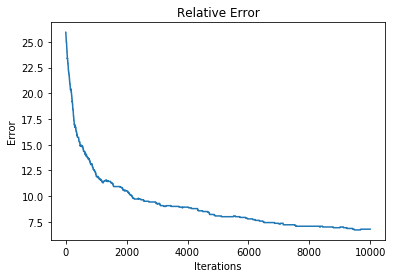

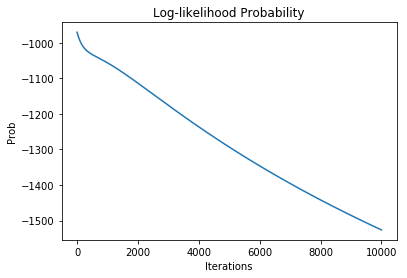

In [5]:
# training process
plt.figure()

plt.title("Relative Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(range(times),errs)
plt.figure()
plt.title("Log-likelihood Probability")
plt.xlabel("Iterations")
plt.ylabel("Prob")
plt.plot(range(times),log_likes)